Neural network simple. 

Everyone is familiar with high school line equation y = mx + b.  
The same is used in neural netowrk but with different name where y = wx + b (w=weights, b=bias)


In [30]:
import torch
from torch.autograd import Variable

# for graphing
import pandas as pd
from plotnine import *
%matplotlib inline

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))

Lets predict the line

In [46]:
def graph(y_data):
  # convert tensor to regular float numbers
  df = pd.DataFrame(list(zip(x_data, y_data)), columns =['x', 'y']).astype("float")
  print(df)
  return(ggplot(df)+aes(x='x',y='y')+geom_line())

     x    y
0  1.0  2.0
1  2.0  4.0
2  3.0  6.0


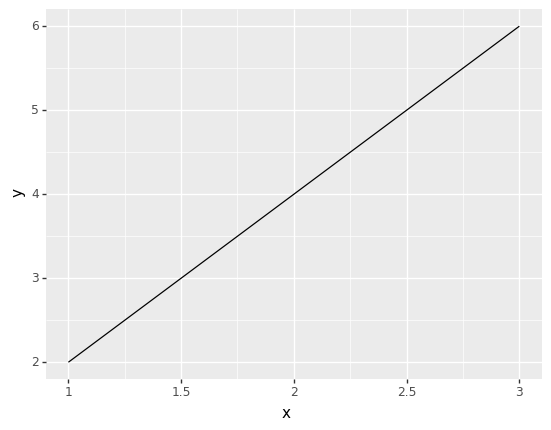

<ggplot: (8776438183976)>

In [47]:
graph(y_data)

In [35]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

The neurons are initialized with random w and b values

In [100]:
our_model = LinearRegressionModel()

In [97]:
def dump():
  for name, param in our_model.named_parameters():
    print(name)
    print(param.detach().numpy())

In [101]:
# MSE = Mean Square Error
criterion = torch.nn.MSELoss()  # mean is the default
# SDG = Stoastic Gradient Descent
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)

In [106]:
def train(epoch): 
    # Forward pass: Compute predicted y by passing
    # debug to visualize
    dump()
    # x to the model
    pred_y = our_model(x_data)
    # Compute and print loss
    loss = criterion(pred_y, y_data)
    # Zero gradients, 
    optimizer.zero_grad()
    # accumulate (i.e. sum) the gradients  
    loss.backward()
    # and update the weights.
    optimizer.step()
  
    print('epoch {}, loss {}'.format(epoch, loss.item()))
    return(graph(pred_y))

linear.weight
[[0.2175284]]
linear.bias
[0.35684094]
epoch 0, loss 12.410057067871094
     x         y
0  1.0  0.574369
1  2.0  0.791898
2  3.0  1.009426


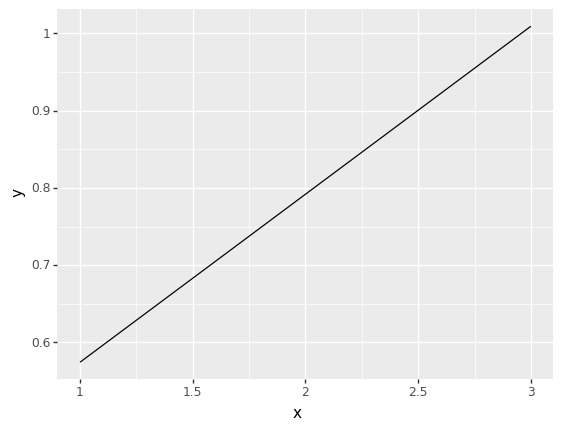

In [107]:
x=train(epoch)
print(x)

In [108]:
1 * 0.2175284 + 0.35684094

0.5743693400000001